In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score, confusion_matrix,classification_report, roc_curve, auc
import pickle

 

In [2]:
df = pd.read_csv(r"/Users/allen/Documents/Sample Data/Copper_Set.csv")

In [3]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df.info()
df.shape
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

# Dealing with Missing Values


In [5]:
df.isnull().sum().sort_values()

quantity tons        0
item type            0
width                0
product_ref          0
item_date            1
customer             1
thickness            1
delivery date        1
selling_price        1
id                   2
status               2
application         24
country             28
material_ref     77919
dtype: int64

In [6]:
# material_ref has large set of null values, so replacing them with unknown 
df['material_ref'].fillna('unknown', inplace=True)
# deleting the remaining null values as they are less than 1% of data which can be neglected
df = df.dropna()

In [7]:
df.isnull().sum().sort_values()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

# Formatting data types

In [8]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date #errors = 'coerce' to fill error data with Nan
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors = 'coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['deliver_date'] = pd.to_datetime(df['delivery date'], format = '%Y%m%d', errors = 'coerce').dt.date                 
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181636 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181636 non-null  object 
 1   item_date      181634 non-null  object 
 2   quantity tons  181635 non-null  float64
 3   customer       181636 non-null  float64
 4   country        181636 non-null  float64
 5   status         181636 non-null  object 
 6   item type      181636 non-null  object 
 7   application    181636 non-null  float64
 8   thickness      181636 non-null  float64
 9   width          181636 non-null  float64
 10  material_ref   181636 non-null  object 
 11  product_ref    181636 non-null  int64  
 12  delivery date  181636 non-null  float64
 13  selling_price  181636 non-null  float64
 14  deliver_date   181634 non-null  object 
dtypes: float64(8), int64(1), object(6)
memory usage: 22.2+ MB


In [10]:
df_dup = df.copy()

In [11]:
# ['quantity tons','selling_price','application','thickness','width', 'country']
# ['status','item type']

df_dup['quantity tons']   # skewed
df_dup['country']
df_dup['application']
df_dup['thickness']       # skewed
df_dup['width']           
df_dup['selling_price']   # skewed

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181668     591.00
181669     589.00
181670     619.00
181671     601.00
181672     607.00
Name: selling_price, Length: 181636, dtype: float64

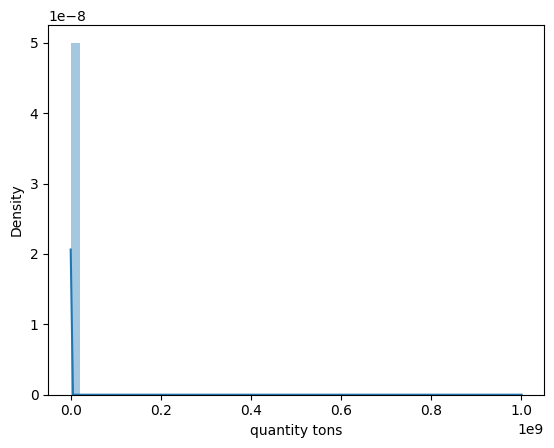

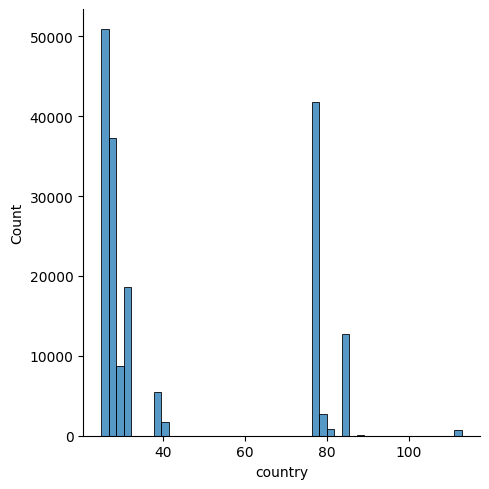

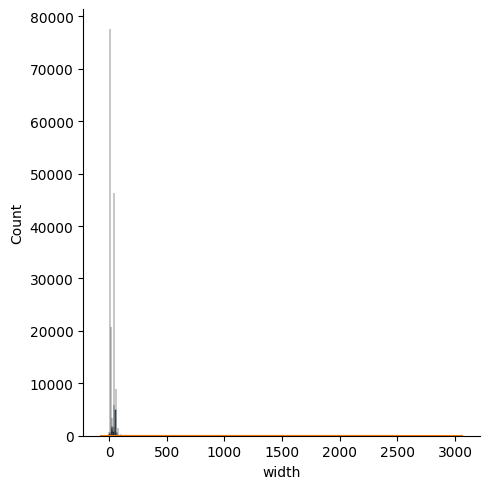

In [12]:
sns.distplot(df_dup['quantity tons'])
sns.displot(df_dup['country'])
sns.displot(df_dup['application'])
sns.distplot(df_dup['thickness'])
sns.distplot(df_dup['width'])
#sns.distplot(df_dup['selling_price'])
plt.show()

In [13]:
mask = df_dup['selling_price'] <= 0
print(mask.sum())

df_dup.loc[mask, 'selling_price'] = np.nan

mask = df_dup['quantity tons'] <= 0
print(mask.sum())
df_dup.loc[mask, 'quantity tons'] = np.nan
df_dup
mask = df_dup['thickness'] <= 0
print(mask.sum())


7
4
0


In [14]:
df_dup.isnull().sum()
df_dup.dropna(inplace = True)

In [15]:
df_dup.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181620 entries, 0 to 181672
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181620 non-null  object 
 1   item_date      181620 non-null  object 
 2   quantity tons  181620 non-null  float64
 3   customer       181620 non-null  float64
 4   country        181620 non-null  float64
 5   status         181620 non-null  object 
 6   item type      181620 non-null  object 
 7   application    181620 non-null  float64
 8   thickness      181620 non-null  float64
 9   width          181620 non-null  float64
 10  material_ref   181620 non-null  object 
 11  product_ref    181620 non-null  int64  
 12  delivery date  181620 non-null  float64
 13  selling_price  181620 non-null  float64
 14  deliver_date   181620 non-null  object 
dtypes: float64(8), int64(1), object(6)
memory usage: 22.2+ MB


<Axes: xlabel='selling_price', ylabel='Density'>

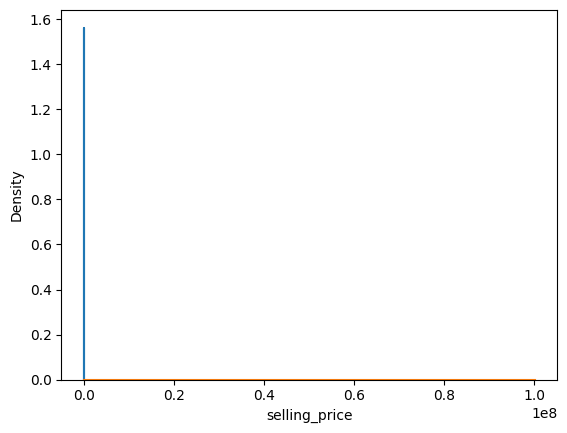

In [16]:
df_dup['selling_price_log'] = np.log(df_dup['selling_price'])

sns.distplot(df_dup['selling_price_log'])
sns.distplot(df_dup['selling_price'])



<Axes: xlabel='quantity tons', ylabel='Density'>

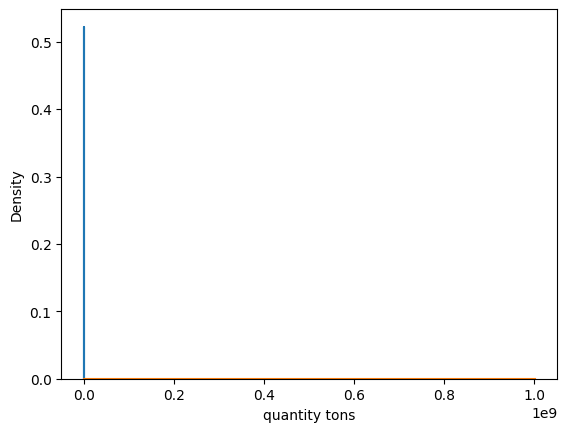

In [17]:
df_dup['quantity tons_log'] = np.log(df_dup['quantity tons'])
sns.distplot(df_dup['quantity tons_log'])
sns.distplot(df_dup['quantity tons'])

<Axes: xlabel='thickness', ylabel='Density'>

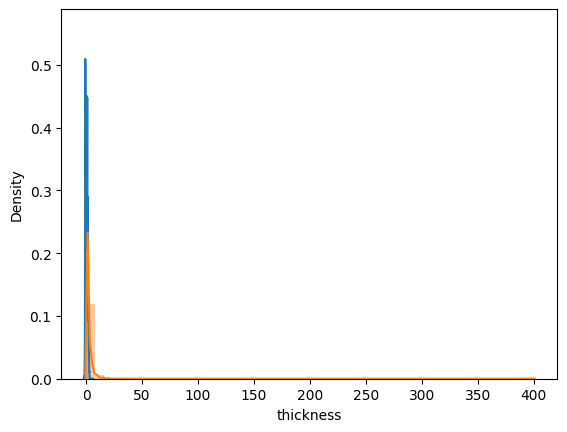

In [18]:


df_dup['thickness_log'] = np.log(df_dup['thickness'])
sns.distplot(df_dup['thickness_log'])
sns.distplot(df_dup['thickness'])


In [19]:
df_dup.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,deliver_date,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-07-01,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,2021-04-01,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-01-01,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-01-01,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-03-01,6.357842,6.666354,1.386294


In [20]:
df_corr = df_dup[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()


## DECISION TREE REGRESSOR 

   #### 1 Encode categorical features
   #### 2 Test and Train split
   #### 3 Define Hyperparameters for GridSearchCV
   #### 4 Train the DecisionTreeRegressor with best parameters
   #### 5 Evalution metrics
   #### 6 Predict the selling price for new values
   #### 7 Save the DecisionTreeRegressor model

<Axes: >

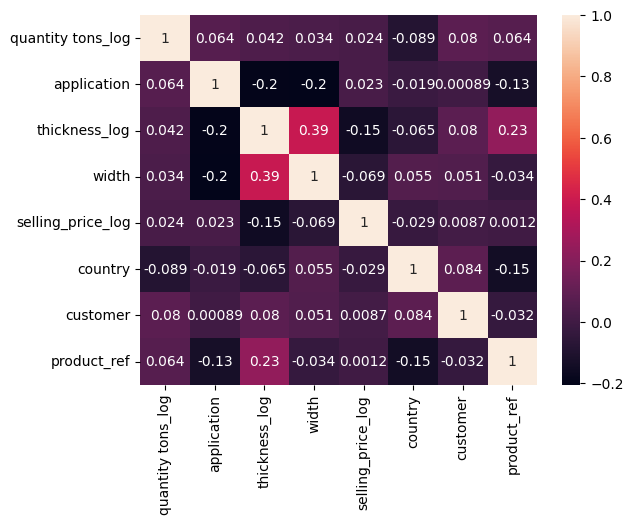

In [21]:
sns.heatmap(df_corr, annot = True)

In [22]:
X=df_dup[['quantity tons_log','status','item type','application','thickness_log','width','country','customer','product_ref']]
y=df_dup['selling_price_log']

In [23]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()

In [24]:


ohe2 = OneHotEncoder(handle_unknown='ignore')
ohe2.fit(X[['status']])
X_be = ohe2.fit_transform(X[['status']]).toarray()
#independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be), axis=1)

In [25]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train Test Split

In [26]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



# Decision Tree Regressor

In [27]:
dtr = DecisionTreeRegressor()
dtr

DecisionTreeRegressor()

In [28]:
# Hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}

In [29]:
# grid search for selecting the best model
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)

In [30]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [31]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [32]:
model = grid_search.best_estimator_

In [33]:
y_predict = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test,y_predict)
print('mse: ',mse,'mae: ', mae)

mse:  0.022952944558306758 mae:  0.11263050569191914


In [35]:
# Predict the status for a new sample
# ['quantity tons_log', 'application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe, X_be)
new_sample = np.array([[np.log(54.15),10.0,np.log(2),1500,28.0,30156308.0,1670798778,'W','Won']])
new_sample_ohe = ohe.transform(new_sample[:, [7]]).toarray()
new_sample_be = ohe2.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
new_sample1 = scaler.transform(new_sample)
new_pred = model.predict(new_sample1)
print('Predicted selling price:', np.exp(new_pred))

Predicted selling price: [712.26296654]


In [36]:
df_dup

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,deliver_date,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-07-01,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,2021-04-01,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-01-01,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-01-01,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-03-01,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,20200701.0,602.00,2020-07-01,6.400257,4.670802,-0.040822
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00,2020-07-01,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00,2020-07-01,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00,2020-07-01,6.428105,1.443523,-0.342490


# Pickling the model

In [37]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('t.pkl', 'wb') as f:
    pickle.dump(ohe, f)
with open('s.pkl', 'wb') as f:
    pickle.dump(ohe2, f)

In [38]:
df_c = df_dup[df_dup['status'].isin(['Won', 'Lost'])]
Y = df_c['status']
X= df_c[['quantity tons_log','selling_price_log','item type','application','thickness_log','width','country','customer','product_ref']]

# encoding categorical variables
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['item type']])
X_ohe = ohe.fit_transform(X[['item type']]).toarray()
be = LabelBinarizer()
be.fit(Y) 
y = be.fit_transform(Y)
# independent features after encoding
X = np.concatenate((X[['quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe), axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

Accuracy: 0.9108223093797779
Confusion Matrix:
[[ 5663  1339]
 [ 1344 21740]]


Confusion Matrix:
[[ 5663  1339]
 [ 1344 21740]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      7002
           1       0.94      0.94      0.94     23084

    accuracy                           0.91     30086
   macro avg       0.88      0.88      0.88     30086
weighted avg       0.91      0.91      0.91     30086



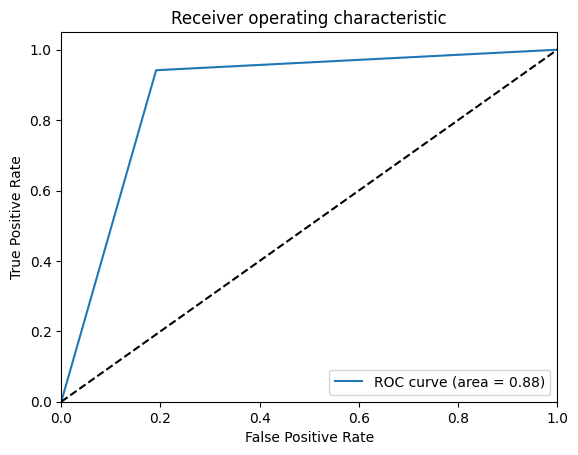

In [39]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [42]:
# Predict the status for a new sample
# 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
new_sample = np.array([[np.log(700), np.log(956), 10, np.log(2),1500,28.0,30202938,1670798778,'W']])
#new_sample = np.array([[54.15,890,10.0,2,1500,28.0,30156308.0,1670798778,'W']])


new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scaler.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


In [43]:
df_dup

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,deliver_date,selling_price_log,quantity tons_log,thickness_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-07-01,6.749931,3.991779,0.693147
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,20210401.0,1047.00,2021-04-01,6.953684,6.643822,-0.223144
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-01-01,6.468211,5.956169,-0.967584
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-01-01,6.643790,5.310301,0.832909
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-03-01,6.357842,6.666354,1.386294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,20200701.0,602.00,2020-07-01,6.400257,4.670802,-0.040822
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,20200701.0,591.00,2020-07-01,6.381816,4.629691,-0.040822
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,20200701.0,589.00,2020-07-01,6.378426,5.337954,-0.051293
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,20200701.0,619.00,2020-07-01,6.428105,1.443523,-0.342490


In [44]:
df_dup.to_csv("copper.csv")

In [45]:
df_dup['status'].value_counts()

status
Won                115996
Lost                34431
Not lost for AM     19566
Revised              4276
To be approved       4167
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

In [46]:
import pickle
with open('cmodel.pkl', 'wb') as file:
    pickle.dump(dtc, file)
with open('cscaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('ct.pkl', 'wb') as f:
    pickle.dump(ohe, f)

In [7]:
%%writefile copper_st.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
import streamlit as st
import re
import pickle

def get_df():
    df = pd.read_csv("copper.csv").reset_index(drop= True)
    return df

            
def load_pickle_regg(quantity_tons,thickness,width,customer):
    flag = 0 
    pattern = "^(?:\d+|\d*\.\d+)$"
    for i in [quantity_tons,thickness,width,customer]:             
        if re.match(pattern, i):
            pass
        else:                    
            flag = 1  
            break

    if flag == 1:
        if len(i) == 0:
            st.warning("Please Enter a Valid number space not allowed")
        else:
            st.write("You have Entered an Invalid Value: ",i)  

    elif flag == 0:
        with open(r"source/model.pkl", 'rb') as file:
            loaded_model = pickle.load(file)
        with open(r'source/scaler.pkl', 'rb') as f:
            scaler_loaded = pickle.load(f)

        with open(r"source/t.pkl", 'rb') as f:
            t_loaded = pickle.load(f)

        with open(r"source/s.pkl", 'rb') as f:
            s_loaded = pickle.load(f)

        return loaded_model, scaler_loaded, t_loaded, s_loaded
def load_pickle_class(cquantity_tons,cthickness,cwidth,ccustomer,cselling):
    cflag=0 
    pattern = "^(?:\d+|\d*\.\d+)$"
    for k in [cquantity_tons,cthickness,cwidth,ccustomer,cselling]:             
        if re.match(pattern, k):
            pass
        else:                    
            cflag=1  
            break

    if cflag == 1:
        if len(k) == 0:
            st.write("please enter a valid number space not allowed")
        else:
            st.write("You have entered an invalid value: ",k)  

    elif cflag == 0:
        import pickle
        with open(r"source/cmodel.pkl", 'rb') as file:
            cloaded_model = pickle.load(file)

        with open(r'source/cscaler.pkl', 'rb') as f:
            cscaler_loaded = pickle.load(f)

        with open(r"source/ct.pkl", 'rb') as f:
            ct_loaded = pickle.load(f)
        return cloaded_model, cscaler_loaded, ct_loaded

df = get_df()

# Setting Page config
st.set_page_config(layout="wide")

#Title
st.write("""
<div style='text-align:center'>
    <h1 style='color:#009999;'>Industrial Copper Modeling Application</h1>
</div>
""", unsafe_allow_html=True)

tab1, tab2 = st.tabs(["PREDICT SELLING PRICE", "PREDICT STATUS"]) 


with tab1:    

        
        # Define the possible values for the dropdown menus
        status_options = df['status'].value_counts().keys().tolist()
        item_type_options = df['item type'].value_counts().keys().tolist()
        country_options = df['country'].value_counts().keys().tolist()
        application_options = df['application'].value_counts().keys().tolist()
        product = df['product_ref'].value_counts().keys().tolist()
        # Define the widgets for user input
        with st.form("my_form"):
            col1,col2,col3=st.columns([5,2,5])
            with col1:
                st.write(' ')
                status = st.selectbox("Status", status_options,key=1)
                item_type = st.selectbox("Item Type", item_type_options,key=2)
                country = st.selectbox("Country", sorted(country_options),key=3)
                application = st.selectbox("Application", sorted(application_options),key=4)
                product_ref = st.selectbox("Product Reference", product,key=5)
            with col3:               
                st.write( f'<h5 style="color:rgb(0, 153, 153,0.4);">NOTE: Min & Max given for reference, you can enter any value</h5>', unsafe_allow_html=True )
                quantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
                thickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
                width = st.text_input("Enter width (Min:1, Max:2990)")
                customer = st.text_input("customer ID (Min:12458, Max:30408185)")
                submit_button = st.form_submit_button(label="PREDICT SELLING PRICE")
                st.markdown("""
                    <style>
                    div.stButton > button:first-child {
                        background-color: #009999;
                        color: white;
                        width: 100%;
                    }
                    </style>
                """, unsafe_allow_html=True)
    

                
                if submit_button:
                    loaded_model,scaler_loaded,t_loaded,s_loaded = load_pickle_regg(quantity_tons,thickness,width,customer)

                    new_sample= np.array([[np.log(float(quantity_tons)),application,np.log(float(thickness)),float(width),country,float(customer),int(product_ref),item_type,status]])
                    new_sample_ohe = t_loaded.transform(new_sample[:, [7]]).toarray()
                    new_sample_be = s_loaded.transform(new_sample[:, [8]]).toarray()
                    new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,]], new_sample_ohe, new_sample_be), axis=1)
                    new_sample1 = scaler_loaded.transform(new_sample)
                    new_pred = loaded_model.predict(new_sample1)[0]
                    st.write('## :green[Predicted selling price:] ', np.exp(new_pred))

with tab2: 
        with st.form("my_form1"):
            col1,col2,col3=st.columns([5,1,5])
            with col1:
                cquantity_tons = st.text_input("Enter Quantity Tons (Min:611728 & Max:1722207579)")
                cthickness = st.text_input("Enter thickness (Min:0.18 & Max:400)")
                cwidth = st.text_input("Enter width (Min:1, Max:2990)")
                ccustomer = st.text_input("customer ID (Min:12458, Max:30408185)")
                cselling = st.text_input("Selling Price (Min:1, Max:100001015)") 
              
            with col3:    
                st.write(' ')
                citem_type = st.selectbox("Item Type", item_type_options,key=21)
                ccountry = st.selectbox("Country", sorted(country_options),key=31)
                capplication = st.selectbox("Application", sorted(application_options),key=41)  
                cproduct_ref = st.selectbox("Product Reference", product,key=51)           
                csubmit_button = st.form_submit_button(label="PREDICT STATUS")
    
            
           
            if csubmit_button:
                cloaded_model,cscaler_loaded,ct_loaded = load_pickle_class(cquantity_tons,cthickness,cwidth,ccustomer,cselling)

            # Predict the status for a new sample
            # 'quantity tons_log', 'selling_price_log','application', 'thickness_log', 'width','country','customer','product_ref']].values, X_ohe
                new_sample = np.array([[np.log(float(cquantity_tons)), np.log(float(cselling)), capplication, np.log(float(cthickness)),float(cwidth),ccountry,int(ccustomer),int(product_ref),citem_type]])
                new_sample_ohe = ct_loaded.transform(new_sample[:, [8]]).toarray()
                new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
                new_sample = cscaler_loaded.transform(new_sample)
                new_pred = cloaded_model.predict(new_sample)
                if new_pred==1:
                    st.write('## :green[The Status is Won] ')
                else:
                    st.write('## :red[The status is Lost] ')
                
st.write( f'<h6 style="color:rgb(0, 153, 153,0.35);">App Created by Allen', unsafe_allow_html=True )  


Overwriting copper_st.py


In [48]:
df_dup['status'].value_counts().keys().tolist()

['Won',
 'Lost',
 'Not lost for AM',
 'Revised',
 'To be approved',
 'Draft',
 'Offered',
 'Offerable',
 'Wonderful']

In [49]:
def fun():
    
    a = 10
    b = 20
    if a == 10:
        print(a)
    else:
        return b
a = fun()
print(a)

10
None
